# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [79]:
#imports
from bs4 import BeautifulSoup
import requests
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [43]:
# test of getting the data

url = 'https://www.azlyrics.com/u/u2band.html' #Put the URL of your AZLyrics Artist Page here!

html_page = requests.get(url) #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [44]:
# inspect the data
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<meta content='U2 lyrics - 230 song lyrics sorted by album, including "With Or Without You", "One", "Lights Of Home".' name="description"/>
<meta content="U2, U2 lyrics, discography, albums, songs" name="keywords"/>
<meta content="noarchive" name="robots"/>
<title>U2 Lyrics</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
<script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js">

In [66]:
def grab_song_links(artist_page_url):
    #get the data
    url = artist_page_url #Put the URL of your AZLyrics Artist Page here!
    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

    # make a list of albums
    albums = soup.find_all("div", class_ = 'album')
    
    data = [] #Create a storage container for songs

    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

In [46]:
grab_song_links(url)

[('I Will Follow', '../lyrics/u2band/iwillfollow.html', 'album: "Boy" (1980)'),
 ('Twilight', '../lyrics/u2band/twilight.html', 'album: "Boy" (1980)'),
 ('An Cat Dubh', '../lyrics/u2band/ancatdubh.html', 'album: "Boy" (1980)'),
 ('Into The Heart',
  '../lyrics/u2band/intotheheart.html',
  'album: "Boy" (1980)'),
 ('Out Of Control',
  '../lyrics/u2band/outofcontrol.html',
  'album: "Boy" (1980)'),
 ('Stories For Boys',
  '../lyrics/u2band/storiesforboys.html',
  'album: "Boy" (1980)'),
 ('The Ocean', '../lyrics/u2band/theocean.html', 'album: "Boy" (1980)'),
 ('A Day Without Me',
  '../lyrics/u2band/adaywithoutme.html',
  'album: "Boy" (1980)'),
 ('Another Time, Another Place',
  '../lyrics/u2band/anothertimeanotherplace.html',
  'album: "Boy" (1980)'),
 ('The Electric Co.',
  '../lyrics/u2band/theelectricco.html',
  'album: "Boy" (1980)'),
 ('Shadows And Tall Trees',
  '../lyrics/u2band/shadowsandtalltrees.html',
  'album: "Boy" (1980)'),
 ('', None, 'album: "Boy" (1980)'),
 ('Gloria', 

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [47]:
# -------------- start of test section

In [48]:
# ------------ end of test section

In [58]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!

from bs4 import BeautifulSoup
import requests

# url = 'https://www.azlyrics.com/u/u2band/withorwithoutyou.html'
url = "https://www.azlyrics.com/lyrics/gomez/getmiles.html"    #test with url from solution

html_page = requests.get(url)
# html_page.content
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1">\r\n<meta name="description" content="Lyrics to &quot;Get Miles&quot; song by Gomez: I love this island but this island\'s killing me Sitting here in silence, man, I don\'t get no peace T..."> \r\n<meta name="keywords" content="Get Miles lyrics, Gomez Get Miles lyrics, Gomez lyrics">\r\n<meta name="robots" content="noarchive">\r\n<meta property="og:image" content="//www.azlyrics.com/az_logo_tr.png">\r\n<title>Gomez - Get Miles Lyrics | AZLyrics.com</title>\r\n\r\n<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css">\r\n<link rel="stylesheet" href="//www.azlyrics.com/bsaz.css">\r\n\r\n<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\r\n<!--[if lt IE 9]>\r\n<script src="https://oss.maxcdn.com/html5shiv/3.7

In [67]:
divs = soup.findAll('div')
divs

[<div id="fb-root"></div>, <div class="container">
 <!-- Brand and toggle get grouped for better mobile display -->
 <div class="navbar-header">
 <button class="navbar-toggle collapsed" data-target="#search-collapse" data-toggle="collapse" type="button">
 <span class="glyphicon glyphicon-search"></span>
 </button>
 <button class="navbar-toggle collapsed" data-target="#artists-collapse" data-toggle="collapse" type="button">
 <span class="glyphicon glyphicon-th-list"></span>
 </button>
 <a class="navbar-brand" href="//www.azlyrics.com"><img alt="AZLyrics.com" class="pull-left" src="//www.azlyrics.com/az_logo_tr.png" style="max-height:40px; margin-top:-10px;"/></a>
 </div>
 <ul class="collapse navbar-collapse nav navbar-nav" id="artists-collapse">
 <li>
 <div class="btn-group text-center" role="group">
 <a class="btn btn-menu" href="//www.azlyrics.com/a.html">A</a>
 <a class="btn btn-menu" href="//www.azlyrics.com/b.html">B</a>
 <a class="btn btn-menu" href="//www.azlyrics.com/c.html">C</

In [68]:
div = divs[0]
div

<div id="fb-root"></div>

In [69]:
for n, div in enumerate(divs):
    if "<!-- Usage of azlyrics.com content by any " in div.text:
        print(n)

In [73]:
main_page = soup.find('div', {"class": "container main-page"})
main_l2 = main_page.find('div', {"class" : "row"})
# main_13 = main_12.find('div', {"class" : "col-sm-6 col-lg-4 text-center artist-col"}
main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})   # use with solution version

In [74]:
lyrics = main_l3.findAll('div')[6].text
lyrics

"\n\r\nI love this island but this island's killing me\nSitting here in silence, man, I don't get no peace\nThe waves upon my shore take me away piece by piece\nGonna leave everything I know gonna head out towards the sea\nJump off this island gonna head out towards the sea\n\nI love this city man, but this city's killing me\nSitting here in all this noise man, I don't get no peace\nThe cars below my street take me away piece by piece\nGonna leave everything I know gonna head out towards the sea\nGonna leave this city man, gonna head out towards the sea\n\nGet miles away, get miles away\nGet miles away, get miles\n\nI love this planet but this planet's killin' me\nSitting here in all this grass man I don't get no weed\nThe sweat comin' from my pores take me away piece by piece\nGonna leave everything I know gonna head to the Galaxy\nGonna leave this planet man, gonna head to the Galaxy\n\nGet miles away, get miles away\nGet miles away, get miles away\nGet miles away, get miles away\nGe

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [85]:
def scrape_lyrics(song_page_url):
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

In [98]:
#Preview First Step
songs = grab_song_links("https://www.azlyrics.com/g/gomez.html")


106
('Get Miles', '../lyrics/gomez/getmiles.html', 'album: "Bring It On" (1998)')


In [100]:
print(len(songs))
print(songs[0])

106
('Get Miles', '../lyrics/gomez/getmiles.html', 'album: "Bring It On" (1998)')


In [104]:
songs

[('Get Miles', '../lyrics/gomez/getmiles.html', 'album: "Bring It On" (1998)'),
 ("Whippin' Piccadilly",
  '../lyrics/gomez/whippinpiccadilly.html',
  'album: "Bring It On" (1998)'),
 ('Make No Sound',
  '../lyrics/gomez/makenosound.html',
  'album: "Bring It On" (1998)'),
 ('78 Stone Wobble',
  '../lyrics/gomez/78stonewobble.html',
  'album: "Bring It On" (1998)'),
 ('Tijuana Lady',
  '../lyrics/gomez/tijuanalady.html',
  'album: "Bring It On" (1998)'),
 ('Here Comes The Breeze',
  '../lyrics/gomez/herecomesthebreeze.html',
  'album: "Bring It On" (1998)'),
 ('Love Is Better Than A Warm Trombone',
  '../lyrics/gomez/loveisbetterthanawarmtrombone.html',
  'album: "Bring It On" (1998)'),
 ('Get Myself Arrested',
  '../lyrics/gomez/getmyselfarrested.html',
  'album: "Bring It On" (1998)'),
 ('Free To Run',
  '../lyrics/gomez/freetorun.html',
  'album: "Bring It On" (1998)'),
 ('Bubble Gum Years',
  '../lyrics/gomez/bubblegumyears.html',
  'album: "Bring It On" (1998)'),
 ("Rie's Wagon",


In [113]:
url_base = "https://www.azlyrics.com"
lyrics = []


# version while testing due to being blacklisted by www.azlyrics.com
# count = 0
# for song in songs:
#     if count == 0:
#         try:
#             url_sffx = song[1].replace('..','')
#             url = url_base + url_sffx
#             print('trying this url: ' + url)
#             lyr = scrape_lyrics(url)
#             print('result: ' + lyr)
#             lyrics.append(lyr)
#         except:
#             print('except triggered')
#             lyrics.append("N/A")
#         count += 1
        

for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = scrape_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")


In [114]:
print(len(songs), len(lyrics))


106 106


In [115]:
lyrics

["\n\r\nI love this island but this island's killing me\nSitting here in silence, man, I don't get no peace\nThe waves upon my shore take me away piece by piece\nGonna leave everything I know gonna head out towards the sea\nJump off this island gonna head out towards the sea\n\nI love this city man, but this city's killing me\nSitting here in all this noise man, I don't get no peace\nThe cars below my street take me away piece by piece\nGonna leave everything I know gonna head out towards the sea\nGonna leave this city man, gonna head out towards the sea\n\nGet miles away, get miles away\nGet miles away, get miles\n\nI love this planet but this planet's killin' me\nSitting here in all this grass man I don't get no weed\nThe sweat comin' from my pores take me away piece by piece\nGonna leave everything I know gonna head to the Galaxy\nGonna leave this planet man, gonna head to the Galaxy\n\nGet miles away, get miles away\nGet miles away, get miles away\nGet miles away, get miles away\nG

In [116]:
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(Get Miles, ../lyrics/gomez/getmiles.html, alb...",\n\r\nI love this island but this island's kil...
1,"(Whippin' Piccadilly, ../lyrics/gomez/whippinp...","\n\r\nOnce upon a time, not too long ago\nWe t..."
2,"(Make No Sound, ../lyrics/gomez/makenosound.ht...","\n\r\nHe's fine, don't make no sound\nHe's fin..."
3,"(78 Stone Wobble, ../lyrics/gomez/78stonewobbl...",\n\r\nI was always told that you have to have ...
4,"(Tijuana Lady, ../lyrics/gomez/tijuanalady.htm...",\n\r\nTake me down\nTo where you hide\nLay me ...


In [117]:
df['Song_Name'] = df[0].map(lambda x: x[0])
df['Song_URL_SFFX'] = df[0].map(lambda x: x[1])
df['Album_Name'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song_Name,Song_URL_SFFX,Album_Name
0,"(Get Miles, ../lyrics/gomez/getmiles.html, alb...",\n\r\nI love this island but this island's kil...,Get Miles,../lyrics/gomez/getmiles.html,"album: ""Bring It On"" (1998)"
1,"(Whippin' Piccadilly, ../lyrics/gomez/whippinp...","\n\r\nOnce upon a time, not too long ago\nWe t...",Whippin' Piccadilly,../lyrics/gomez/whippinpiccadilly.html,"album: ""Bring It On"" (1998)"
2,"(Make No Sound, ../lyrics/gomez/makenosound.ht...","\n\r\nHe's fine, don't make no sound\nHe's fin...",Make No Sound,../lyrics/gomez/makenosound.html,"album: ""Bring It On"" (1998)"
3,"(78 Stone Wobble, ../lyrics/gomez/78stonewobbl...",\n\r\nI was always told that you have to have ...,78 Stone Wobble,../lyrics/gomez/78stonewobble.html,"album: ""Bring It On"" (1998)"
4,"(Tijuana Lady, ../lyrics/gomez/tijuanalady.htm...",\n\r\nTake me down\nTo where you hide\nLay me ...,Tijuana Lady,../lyrics/gomez/tijuanalady.html,"album: ""Bring It On"" (1998)"


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [118]:
pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]

miles    12
this     11
get       9
I         9
away      7
piece     6
the       6
Get       6
head      6
away,     6
dtype: int64

Text(0.5, 1.0, "Top 10 Lyrics for Whippin' Piccadilly")

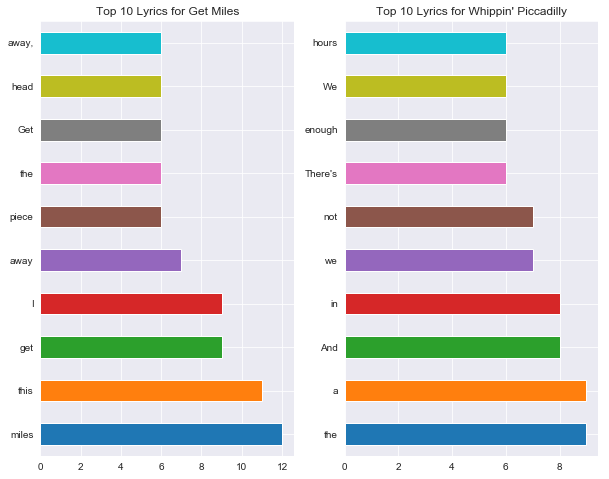

In [119]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!